In [1]:
import numpy as np
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Red
n=np.random.normal(10,1,300)
g=np.random.gamma(0.8,1,300)

In [3]:
#Blue
b=np.random.normal(11,.5,300)
bb=np.random.normal(4,2,300)

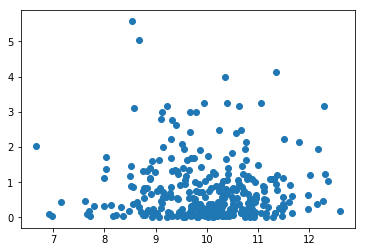

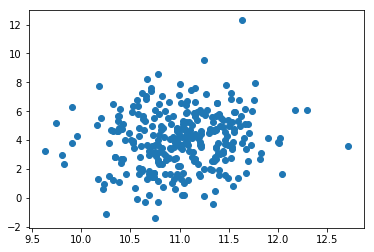

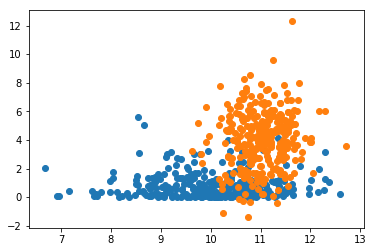

In [4]:
plt.scatter(n,g)
plt.show()
plt.scatter(b,bb)
plt.show()
plt.scatter(n,g)
plt.scatter(b,bb)

In [4]:
x1=[]
x2=[]
y0=[]

for x,y in zip(n,g):
    x1.append(x)
    x2.append(y)
    y0.append(0)

for a,c in zip(b,bb):
    x1.append(a)
    x2.append(c)
    y0.append(1.0)

In [6]:
xs=np.hstack((np.asarray(x1).reshape((600,1)),np.asarray(x2).reshape((600,1)))) #reshape for stacking
ys=np.asarray(y0)

print("xs:",xs.shape)
print("ys:",ys.shape)

xs: (600, 2)
ys: (600,)


In [12]:
mdl=LinearSVC(penalty='l2', 
              loss='squared_hinge', 
              dual=True, 
              tol=0.0001, 
              C=.50, 
              multi_class='ovr', 
              fit_intercept=True, 
              intercept_scaling=1, 
              class_weight=None, 
              verbose=0, 
              random_state=None, 
              max_iter=1000)
mdl.fit(xs,ys)

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [8]:
colors=[]
for i in range(300):
    colors.append("blue")
    
for i in range(300):
    colors.append("red")

In [23]:
x = np.linspace(6, 14, 30).reshape((-1,1))
y = np.linspace(-4, 12, 30).reshape((-1,1))
Y, X = np.meshgrid(y, x) 
#Meshgrid can help make pairwise combos...
#X: EACH of the 6-14 (30 values) is now repeated 30 times across horizontally
#Y: the ENTIRE y array is repeated across horizontally

In [13]:
xy = np.vstack([X.ravel(), Y.ravel()]).T #flatten, stack, T into 2 columns: xy coordinates
P = mdl.decision_function(xy).reshape(X.shape) #turning (900,) into (30,30) #DISTANCE FROM HYPERPLANE

In [14]:
print("intercept:",mdl.intercept_[0])
print("x1:",mdl.coef_[0][0])
print("x2:",mdl.coef_[0][1])

#Simulate decision function: calculates the distance from the SVM solution line
mdl.intercept_[0]+mdl.coef_[0][0]*0 + mdl.coef_[0][1]*10

intercept: -3.51059527459104
x1: 0.25251765000931403
x2: 0.4121055010580806


0.6104597359897657

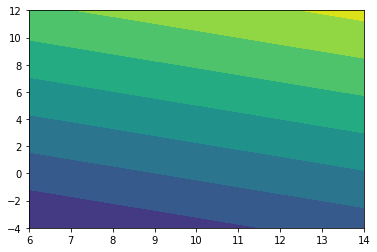

In [48]:
#CONTOURF: In this example every dot in the meshgrid is plotted and P is the color value
#Around the hyperplane the colors are most similar
#As you go up, aka more positive, color get brighter. Vice Versa for down.
plt.scatter(xs[:,0],xs[:,1],c=colors)
plt.contourf(X, Y,P)

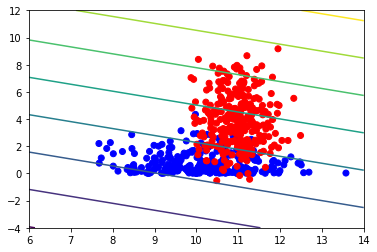

In [49]:
#CONTOUR:
plt.scatter(xs[:,0],xs[:,1],c=colors)
plt.contour(X, Y,P) #automatically only shows points with integer P values

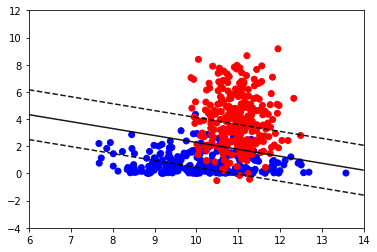

In [97]:
plt.scatter(xs[:,0],xs[:,1],c=colors)

plt.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.9,
               linestyles=['--', '-', '--'])

#contours take the mesh points and HEIGHT P. 
#levels: filter for desired lines. We want level 0 (no distance from hyperplane)
#alpha: darkness of line

In [22]:
#NOW TRYING WITH POLYNOMIAL KERNEL
mdl2=SVC(C=1, 
        kernel='poly', 
        degree=2, 
        gamma=2, #must change from default "auto_depracated"!
        coef0=0.0, 
        shrinking=True, 
        probability=False, 
        tol=0.001, 
        cache_size=200, 
        class_weight=None, 
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        random_state=None)

mdl2.fit(xs,ys)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma=2, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

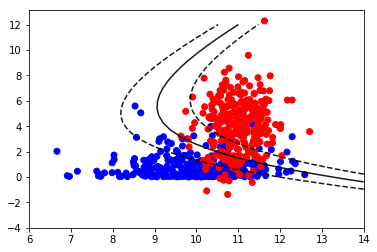

In [23]:
P = mdl2.decision_function(xy).reshape(X.shape)

plt.scatter(xs[:,0],xs[:,1],c=colors)
plt.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.9,
               linestyles=['--', '-', '--'])

In [ ]:
#Visualize multiple dimensions (PCA)